In [10]:
import csv
import build_influence_network as bn
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import pylab as pl
import networkx as nx
import numpy as np

In [11]:
# As a csv.reader is an expendible resource we write the lines of our csv file to a list
with open("influence_data.csv", "rt") as infile:
        reader = csv.reader(infile)
        # We discard the column labels as they are unneccesary 
        next(reader)
        inf_data = list(reader)

In [12]:
# As a csv.reader is an expendible resource we write the lines of our csv file to a list
with open("data_by_artist.csv", "rt") as infile:
        reader = csv.reader(infile)
        # We discard the column labels as they are unneccesary 
        next(reader)
        artist_data = list(reader)

In [13]:
# As a csv.reader is an expendible resource we write the lines of our csv file to a list
with open("artist_centrality_combined.csv", "rt") as infile:
        reader = csv.reader(infile)
        # We discard the column labels as they are unneccesary 
        next(reader)
        cent_data = list(reader)

In [14]:
graph = bn.build_graph(inf_data, artist_data)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Name: 
Type: DiGraph
Number of nodes: 5603
Number of edges: 42770
Average in degree:   7.6334
Average out degree:   7.6334
Our artistic influence network has 5603 artists.
Our artistic influence network has 42770 edges out of a possible 31388006 possible edges.
Our graph is an acyclic directed graph: False
Our network density is: 0.0013626223978675167
Our graph is strongly connectayed: False
The number of strongly connected components is: 4747
Our graph is weakly connected: False
The number of weakly connected components is: 3
The average clustering coefficient is: 0.09128001728442253
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Below is a function which draws the ego graph of a specified node. This is all of the other nodes which are connected to it at a specified depth. Here we use a depth of 1.

If we wanted to find all of the nodes that are connected to the nodes that are connected to the node in quesiton we would set our depth to 2.

See:
https://networkx.org/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html

In [12]:
def draw_ego_graph(graph, node):
    # Find the ego graph.
    # For input on whether or not to flag undirected as true or false see:
    # https://networkx.org/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html

    # Somehwhere along the line the original node id is lost, we preserve it here.
    node_id = node
    ego_graph = nx.ego_graph(graph, node, undirected=True, distance = 1)
    # The ego graph has a rather annoying property in that it keeps those who the Beetles cite as an influence.
    # We prune those nodes here in a rather hack-y manner.
    node_list = []
    for node in ego_graph.nodes():
            if node in graph.successors(node_id):
                node_list.append(node)
    for node in node_list:            
        ego_graph.remove_node(node)

    for node in ego_graph:
        if node in graph.nodes():
                ego_graph.nodes[node]["name"] = graph.nodes[node]["name"]
    # Why do we reverse the graph? See the above documentation. In short, we want nodes that point to
    # the node in question.
    reversed_graph = ego_graph.reverse()
    # Draw the ego graph.
    labels = nx.get_node_attributes(ego_graph, "name") 
    pos = nx.spring_layout(ego_graph)
    nx.draw(ego_graph, pos, node_color="b", node_size=25, labels=labels)
    # Draw ego as large and red
    options = {"node_size": 300, "node_color": "r"}
    nx.draw_networkx_nodes(ego_graph, pos, nodelist=[node_id], **options)
    plt.show()
    
    return ego_graph

Our artist is The Beatles


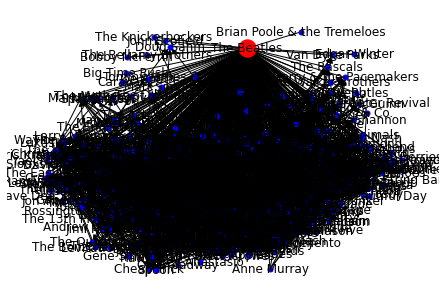

Our artist is Bob Dylan


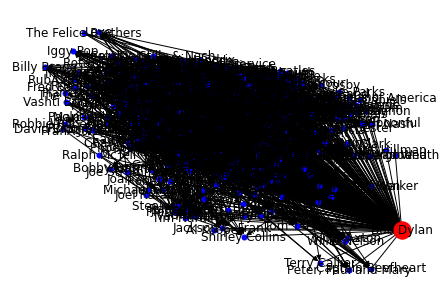

Our artist is The Rolling Stones


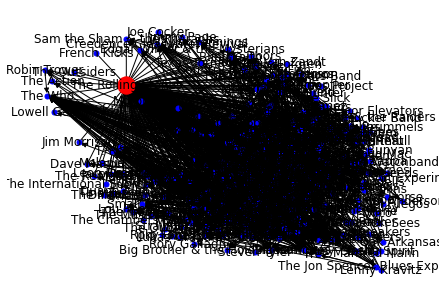

Our artist is David Bowie


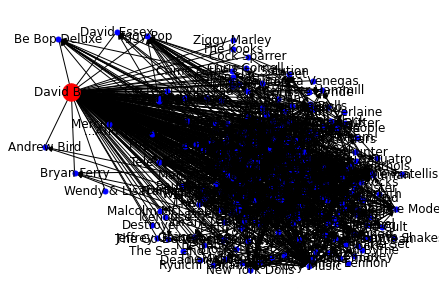

Our artist is Led Zeppelin


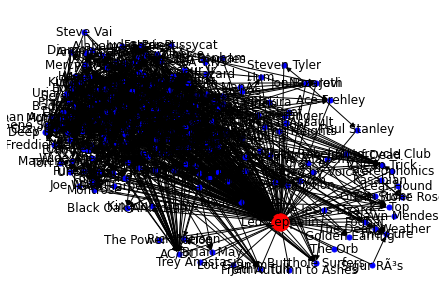

Our artist is Jimi Hendrix


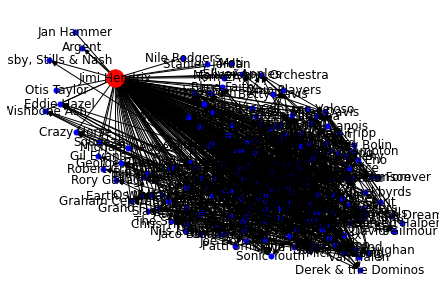

Our artist is The Kinks


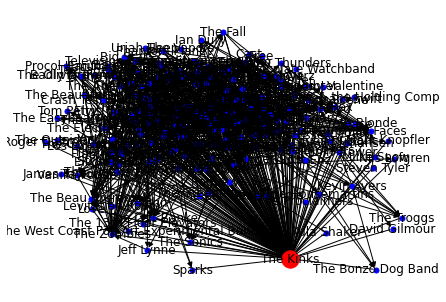

Our artist is The Beach Boys


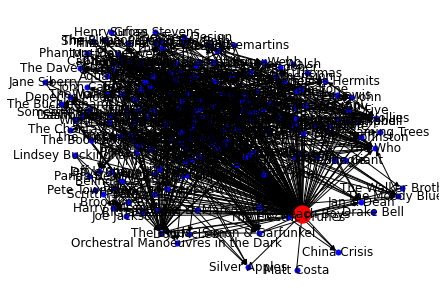

Our artist is Hank Williams


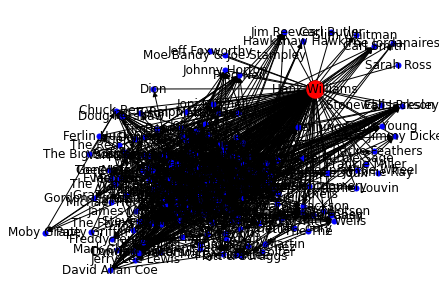

Our artist is The Velvet Underground


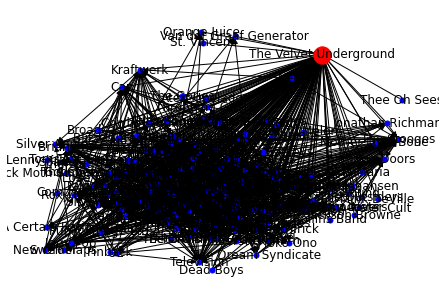

Our artist is Willie Nelson


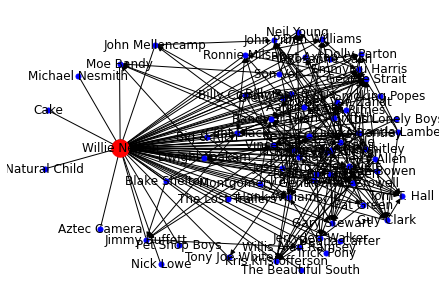

Our artist is Uncle Tupelo


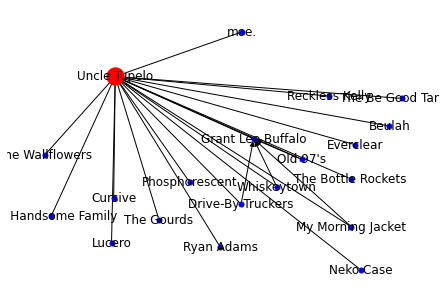

Our artist is Phosphorescent


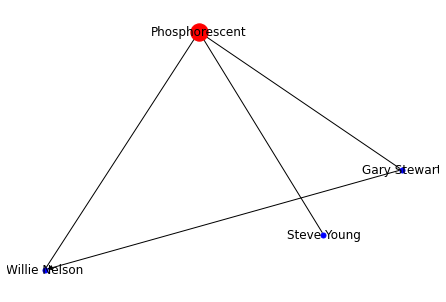

Our artist is Hoyt Axton


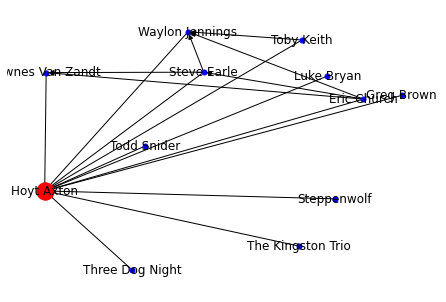

Our artist is The Kingston Trio


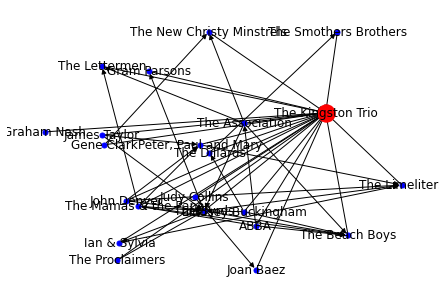

Our artist is Miles Davis


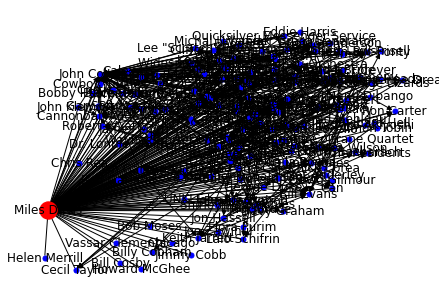

Our artist is Sly & the Family Stone


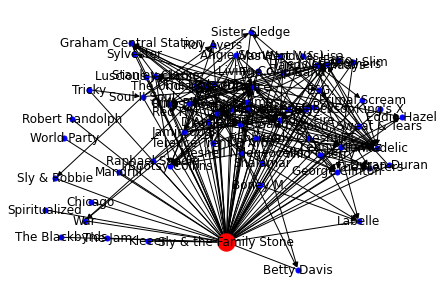

Our artist is Jefferson Airplane


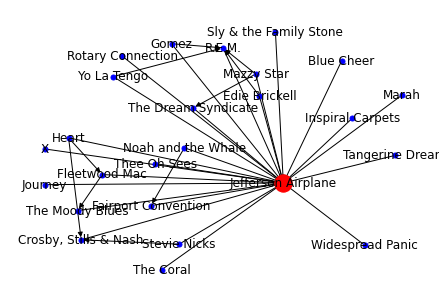

Our artist is Sex Pistols


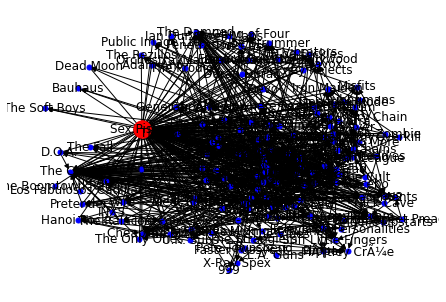

Our artist is Chuck Berry


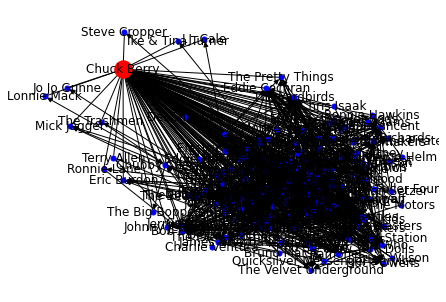

Our artist is Muddy Waters


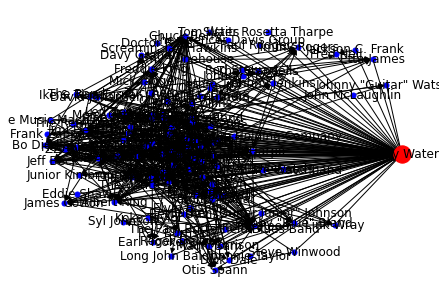

Our artist is Louis Jordan


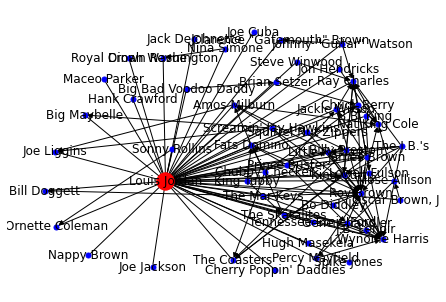

Our artist is Little Richard


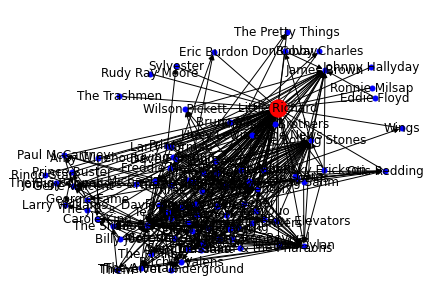

Our artist is Elvis Presley


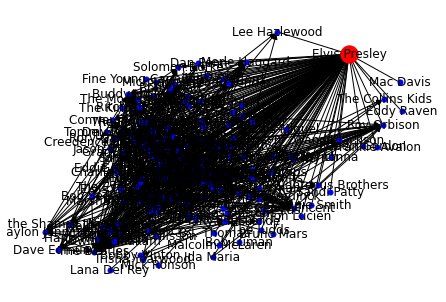

Our artist is Roy Brown


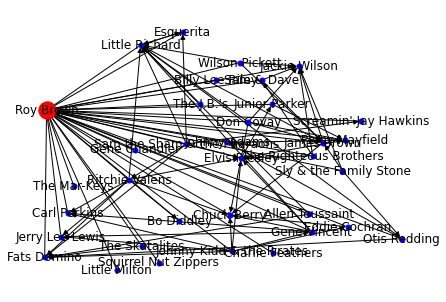

Our artist is Howlin' Wolf


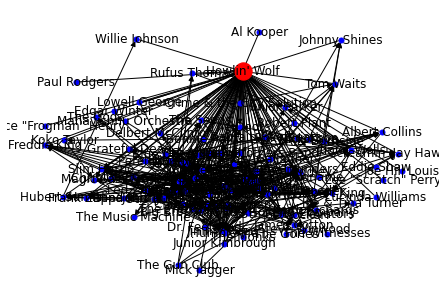

Our artist is Cab Calloway


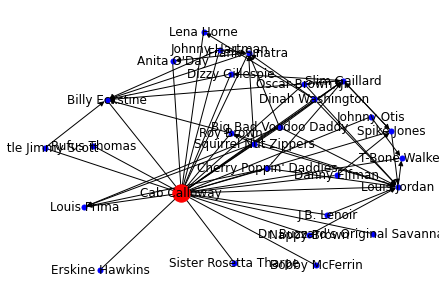

Our artist is Billie Holiday


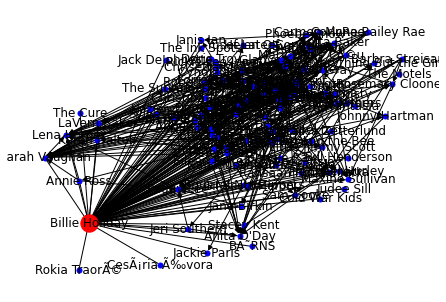

Our artist is Lester Young


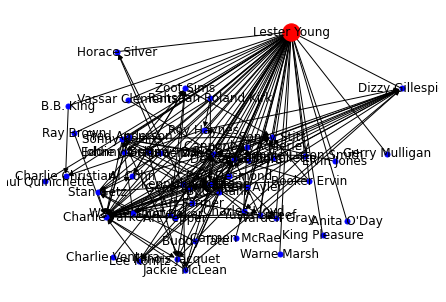

Our artist is T-Bone Walker


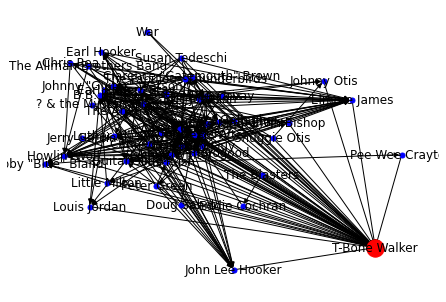

Our artist is Sister Rosetta Tharpe


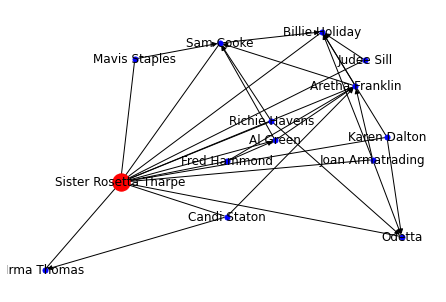

Our artist is The Mills Brothers


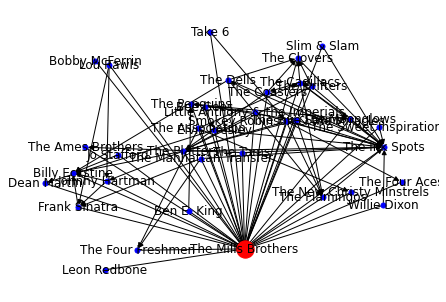

Our artist is Roy Acuff


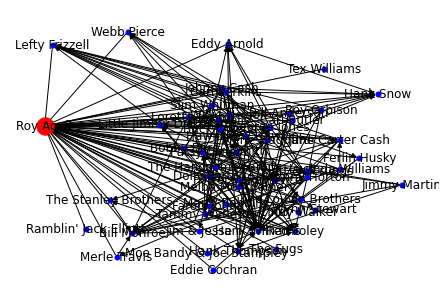

Our artist is Charlie Christian


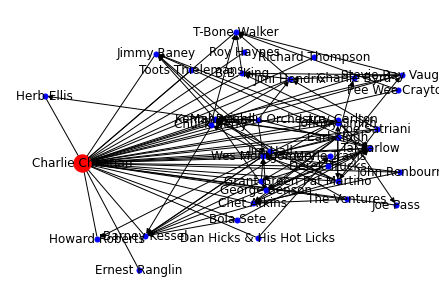

Our artist is Billy Eckstine


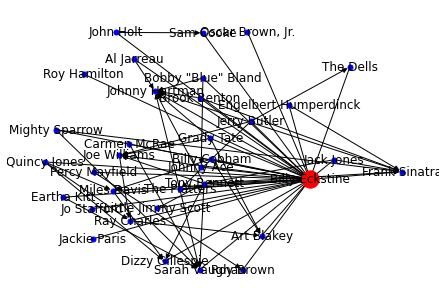

Our artist is Nat King Cole


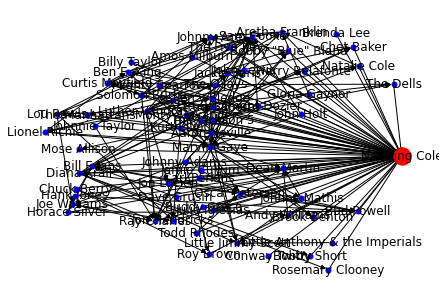

Our artist is Wynonie Harris


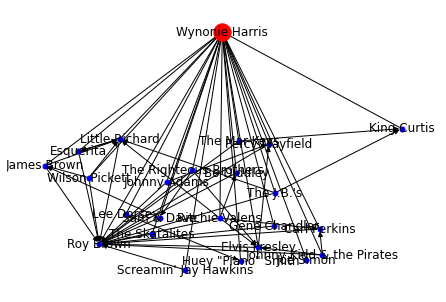

Our artist is James Brown


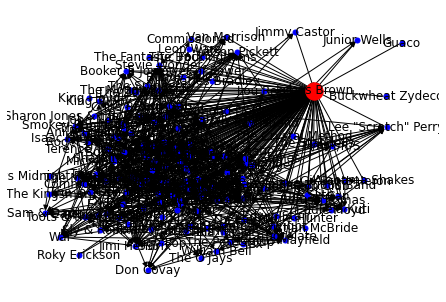

Our artist is Ray Charles


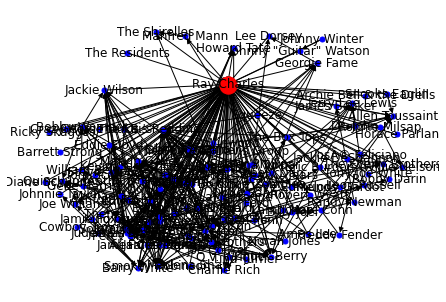

In [15]:
for row in cent_data:
    print("Our artist is " + str(row[1]))
    node_id = row[0]
    draw_ego_graph(graph, node_id)

Here we find the ancestors of a node. We then find out what percentage of the graph has a path back to the node in question. 

See: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.dag.ancestors.html

In [16]:
def get_ancestors(graph, node):
    ancestors = nx.ancestors(graph, node)
    print("The artist " + str(graph.nodes[node]["name"]) + " has an in-degree of " + str(graph.in_degree(node)) + ".")
    print("This is " + str(((graph.in_degree(node)/len(graph.nodes))*100)) + "%" + " of our graph.")
    print("The artist " + str(graph.nodes[node]["name"]) + " has " + str(len(ancestors)) + " ancestors.")
    print("This is " + str(((len(ancestors)/len(graph.nodes))*100)) + "%" + " of our graph.")
    print("--------------------------------------------------")

In [18]:
for row in cent_data:
    artist = row[0]
    get_ancestors(graph, artist)

The artist The Beatles has an in-degree of 615.
This is 10.976262716401926% of our graph.
The artist The Beatles has 4648 ancestors.
This is 82.9555595216848% of our graph.
--------------------------------------------------
The artist Bob Dylan has an in-degree of 389.
This is 6.942709262894878% of our graph.
The artist Bob Dylan has 4648 ancestors.
This is 82.9555595216848% of our graph.
--------------------------------------------------
The artist The Rolling Stones has an in-degree of 319.
This is 5.693378547206854% of our graph.
The artist The Rolling Stones has 4648 ancestors.
This is 82.9555595216848% of our graph.
--------------------------------------------------
The artist David Bowie has an in-degree of 238.
This is 4.2477244333392825% of our graph.
The artist David Bowie has 4648 ancestors.
This is 82.9555595216848% of our graph.
--------------------------------------------------
The artist Led Zeppelin has an in-degree of 221.
This is 3.944315545243619% of our graph.
The ar

In [31]:
# https://gist.github.com/maciejkos/e3bc958aac9e7a245dddff8d86058e17
def draw_graph3(networkx_graph,notebook=True,output_filename='graph.html',show_buttons=True,only_physics_buttons=False,
                height=None,width=None,bgcolor=None,font_color=None,pyvis_options=None):
    """
    This function accepts a networkx graph object,
    converts it to a pyvis network object preserving its node and edge attributes,
    and both returns and saves a dynamic network visualization.
    Valid node attributes include:
        "size", "value", "title", "x", "y", "label", "color".
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_node)
    Valid edge attributes include:
        "arrowStrikethrough", "hidden", "physics", "title", "value", "width"
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_edge)
    Args:
        networkx_graph: The graph to convert and display
        notebook: Display in Jupyter?
        output_filename: Where to save the converted network
        show_buttons: Show buttons in saved version of network?
        only_physics_buttons: Show only buttons controlling physics of network?
        height: height in px or %, e.g, "750px" or "100%
        width: width in px or %, e.g, "750px" or "100%
        bgcolor: background color, e.g., "black" or "#222222"
        font_color: font color,  e.g., "black" or "#222222"
        pyvis_options: provide pyvis-specific options (https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.options.Options.set)
    """

    # import
    from pyvis import network as net

    # make a pyvis network
    network_class_parameters = {"notebook": notebook, "height": height, "width": width, "bgcolor": bgcolor, "font_color": font_color}
    pyvis_graph = net.Network(**{parameter_name: parameter_value for parameter_name, parameter_value in network_class_parameters.items() if parameter_value})

    # for each node and its attributes in the networkx graph
    for node,node_attrs in networkx_graph.nodes(data=True):
        node_name = networkx_graph.nodes[node]["name"]
        pyvis_graph.add_node(node_name,**node_attrs)

    # for each edge and its attributes in the networkx graph
    for source,target,edge_attrs in networkx_graph.edges(data=True):
        # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
        if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
            # place at key 'value' the weight of the edge
            edge_attrs['value']=edge_attrs['weight']
        # add the edge
        source_name = networkx_graph.nodes[source]["name"]
        target_name = networkx_graph.nodes[target]["name"]
        pyvis_graph.add_edge(source_name,target_name,**edge_attrs)

    # turn buttons on
    if show_buttons:
        if only_physics_buttons:
            pyvis_graph.show_buttons(filter_=['physics'])
        else:
            pyvis_graph.show_buttons()

    # pyvis-specific options
    if pyvis_options:
        pyvis_graph.set_options(pyvis_options)

    # return and also save
    return pyvis_graph.show(output_filename)

In [32]:
draw_graph3(graph, height = '1000px', width = '1000px', 
            show_buttons=True,  
            output_filename='graph_output_communities.html', notebook=True)